<a href="https://colab.research.google.com/github/violaamelia24/Projek-Analisis-Data-Dicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Viola Amelia
- **Email:** v.amelia2407@gmail.com
- **ID Dicoding:** viola_amelia_PkHd

## Menentukan Pertanyaan Bisnis

- Bagaimana rata-rata penjualan dari toko A?
- Apa sistem pembayaran yang banyak digunakan oleh pembeli?

## Import Semua Packages/Library yang Digunakan

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

## Data Wrangling

### Gathering Data

In [87]:
order_payment= pd.read_csv("order_payments_dataset.csv")
order_payment.head()

items= pd.read_csv("order_items_dataset.csv")
product=pd.read_csv("products_dataset.csv")
order=pd.read_csv("orders_dataset.csv")

df_one=pd.merge(order_payment,items,on='order_id',how='inner')
df_ones=pd.merge(df_one,order,on='order_id',how='inner')
df_two=pd.merge(df_ones,product,on='product_id',how='inner')
df=df_two.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
df['order_date'] = df['order_purchase_timestamp'].str[:10]
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,order_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,casa_construcao,2018-04-25
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,13.92,0e37385834260d6111727103a93e790a,delivered,2018-04-15 22:53:59,2018-04-15 23:10:32,2018-04-16 23:54:55,2018-04-20 00:07:39,2018-05-09 00:00:00,casa_construcao,2018-04-15
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,automotivo,2018-06-26
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,perfumaria,2017-12-12
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,11.90,7238ed1e0d25683b9b65e1039e9d942b,invoiced,2017-08-22 16:01:44,2017-08-23 16:06:59,NaN,NaN,2017-09-19 00:00:00,perfumaria,2017-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,6a87a0371f263aa8c1779c2c115c1427,1,credit_card,2,83.09,1,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,4dbe5e9eb8cc354eb79fa6e9971d0a3d,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,beleza_saude,2017-11-25
117597,e0657085c2b6297a32f39efa200cdf72,1,credit_card,1,26.37,1,e2336d327209ca849dca5afda036f842,a8739afb32aaa45e01815ca76f76f54b,2018-08-07 21:24:28,18.98,7.39,a109663eb89cc2658b051385cac35f02,delivered,2018-08-04 21:12:12,2018-08-04 21:24:28,2018-08-07 09:00:00,2018-08-08 17:49:25,2018-08-10 00:00:00,eletronicos,2018-08-04
117598,9ac048d7ffebba67d54456aa9ec07d7e,1,credit_card,1,60.69,1,0dcb1adbafdcc389972874b01fa249b8,2f74af7a0ee5636f12c2336f9fffed47,2017-11-24 19:09:29,44.90,15.79,43b2b1e92aa657113661dae48ca9e17c,delivered,2017-11-20 18:50:52,2017-11-20 19:09:29,2017-11-24 18:24:57,2017-12-05 22:56:43,2017-12-12 00:00:00,esporte_lazer,2017-11-20
117599,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,1,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12 00:00:00,brinquedos,2018-05-16


### Assessing Data

Mengecek tipe data

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   payment_sequential             117601 non-null  int64  
 2   payment_type                   117601 non-null  object 
 3   payment_installments           117601 non-null  int64  
 4   payment_value                  117601 non-null  float64
 5   order_item_id                  117601 non-null  int64  
 6   product_id                     117601 non-null  object 
 7   seller_id                      117601 non-null  object 
 8   shipping_limit_date            117601 non-null  object 
 9   price                          117601 non-null  float64
 10  freight_value                  117601 non-null  float64
 11  customer_id                    117601 non-null  object 
 12  order_status                  

Mengecek missing value

In [89]:
df.isna().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
product_category_name            1698
order_date                          0
dtype: int64

In [17]:
print("Duplicates : ", df.duplicated().sum())

Duplicates :  0


Mengecek Parameter Statistik

In [90]:
df.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,1.093528,2.939482,172.686752,1.195900,120.824783,20.045990
std,0.726692,2.774223,267.592290,0.697706,184.479323,15.861315
min,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,60.870000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.210000,1.000000,74.900000,16.290000
75%,1.000000,4.000000,189.260000,1.000000,134.900000,21.190000
max,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000


### Cleaning Data

In [91]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   payment_sequential             117601 non-null  int64         
 2   payment_type                   117601 non-null  object        
 3   payment_installments           117601 non-null  int64         
 4   payment_value                  117601 non-null  float64       
 5   order_item_id                  117601 non-null  int64         
 6   product_id                     117601 non-null  object        
 7   seller_id                      117601 non-null  object        
 8   shipping_limit_date            117601 non-null  object        
 9   price                          117601 non-null  float64       
 10  freight_value                  117601 non-null  float64       
 11  

## Exploratory Data Analysis (EDA)

### Explore ...

In [93]:
df.describe(include="all")

<ipython-input-93-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,order_date
count,117601,117601.000000,117601,117601.000000,117601.000000,117601.000000,117601,117601,117601,117601.000000,117601.000000,117601,117601,117601,117586,116356,115034,117601,115903,117601
unique,98665,NaN,4,NaN,NaN,NaN,32951,3095,93317,NaN,NaN,98665,7,98111,90173,81016,95663,449,73,615
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,cama_mesa_banho,2017-11-24 00:00:00
freq,63,NaN,86769,NaN,NaN,NaN,536,2133,63,NaN,NaN,63,115035,63,63,63,63,649,11823,1410
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 00:00:00
mean,NaN,1.093528,NaN,2.939482,172.686752,1.195900,NaN,NaN,NaN,120.824783,20.045990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.726692,NaN,2.774223,267.592290,0.697706,NaN,NaN,NaN,184.479323,15.861315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,60.870000,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Apa sistem pembayaran yang banyak digunakan oleh pembeli?**

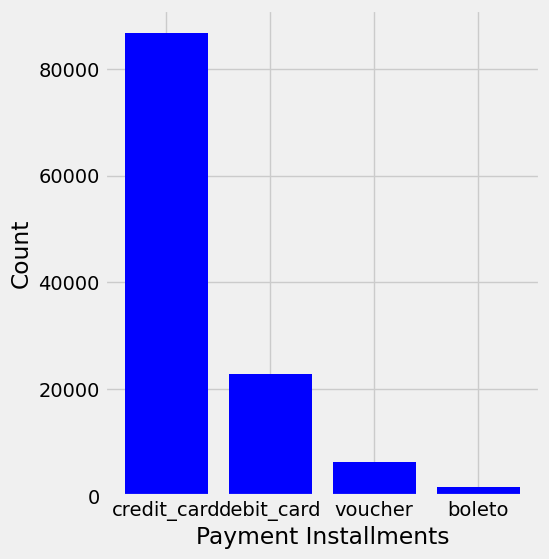

In [94]:
fig= plt.figure(figsize=(5,6))
plt.style.use('fivethirtyeight')
plt.bar(
    x=df["payment_type"].unique(),
    height=df["payment_type"].value_counts().to_list(),
    color='blue'
    )
plt.xlabel('Payment Installments')
plt.ylabel('Count')
plt.show()

### Pertanyaan 2:

**Bagaimana rata-rata penjualan di e-commerce tersebut?**

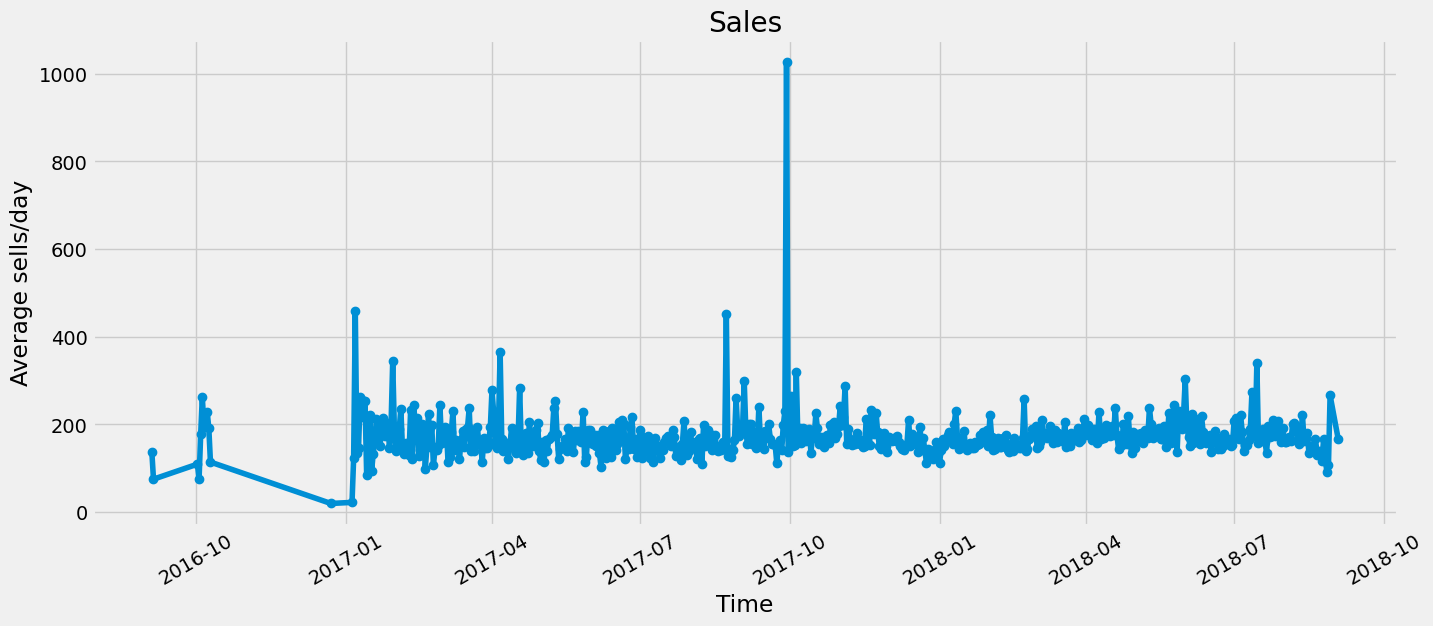

In [95]:
average_sales = df.groupby('order_date')['payment_value'].mean().reset_index()

fig2=plt.figure(figsize=(15,6))
plt.plot(average_sales['order_date'], average_sales['payment_value'], marker='o')
plt.title("Sales")
plt.xlabel("Time")
plt.ylabel("Average sells/day")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

## Conclusion

- From the Type of Payment bar chart we know that Credit Card is the most type of payment that the buyers use. It can be a concern to a seller that if they want to raise up their sells, they can make a promotion with terms and condition type of payment. And we can see what fiture that we can upgrade more.
- From the Sales Line Chart we can see that the sales from each day is stable, and there's a day with pop up sales which in 2017, from the data we can evaluate more about the sales and when the time that people more buy, so we can get more promotion, like example in twin date like 2.2 promotion or, etc. and how to manage days that have lower sales. So we can keep running the app and provide what people needs these days.